# The Task

To benchmark the performance LLMs, prepare 5 benchmark questions related to common market research questions. The areas of questions:

*Trend analysis:* e.g. what are key trending libraries in Data Science market?

*Competitive Landscape:* e.g. what are main competitors of PyCharm?

*Competitive Pricing:* what is competitive pricing for product X?

Choose 5 LLMs to benchmark (you are free to choose from a wide variety of latest LLMs). Finally, prepare evaluation criterias for each benchmark question.

**Resulting output**

*Compiled Responses:* A document containing all the LLMs' responses to each benchmark question.

*Evaluation Matrix:* A table comparing the LLMs' performance based on the defined evaluation criteria for each question.

*Summary Report:* A concise report summarizing the key findings of the benchmark, highlighting strengths and weaknesses of each LLM, and offering recommendations.

Share the link to the artifacts located on GitHub or Google Drive.


# Introduction

This document represent itself a resulting output and contains compiled responses, evaluation matrix, and summary report altogether.

Despite a significant role of a human-annotator in the benchmarking of LLMs, I also believe that during any benchmarking it is important to imply as much automatization as possible to save human time and resources. That is why I chose to use coding tools to create the report.

## Pipeline

I divide the question used in this report for two types:

1. Questions that have text answer;
2. Questions that have numerical answer.

To get question answers:
1. I use publicly available APIs (this is due to some instruct-tuned models being too heavy to run them in the Colab).
2. a. For the first type of questions, I measure the cosine similarity of both models' answers and human-annotated answers using embeddings from a third-model (I got the idea from [Zheng et al., 2023](https://arxiv.org/abs/2306.05685)). If cosine similarity of a model answer is above the certain threshold, it counts as a correct answer. This approach simplifies the evaluation of answers given by LLMs as human evaluation process needs carefully-designed criterias and rules. Human evaluation process also sometimes can cause confusion, e.g., if the model answer is not exactly similar to the correct one.
   
   b. For the second type, the model's answer allowed to be different from human-annotated answer in a certain number of times.

# Questions Dataset

In this section benchmarking questions are presented. The questions are about AI market. I tried to make questions as precise as possible. This is due to market changes over time and countries. For example, if the question is about most populart Python libraries, it should contain year and desirably area of library implementation (e.g., ML).

## Question 1

**Q1: What are the most well-payed ML positions U.S. in 2024? Give only a list of top-5 positions.**

This is *trend analysis* question. To answer that question, I browsed three sources ([1](https://www.birchwoodu.org/highest-paying-artificial-intelligence-ai-machine-learning-ml-jobs/), [2](https://www.vktr.com/ai-market/10-top-machine-learning-ml-jobs-and-salaries/), [3](https://www.upwork.com/resources/highest-paying-machine-learning-jobs)) and chose overlap ML positions inbetween them. The right answer should be following:

**A1: ML Engineer, NLP Engineer, Data Scientist, CV Engineer, AI Engineer.**

Ideally, I would base the correct answer on some statistics data. For example, take [this dataset](https://www.kaggle.com/datasets/kanchana1990/ai-and-ml-job-listings-usa), merge similar position under one name and look at the top positions by average salary. However, this approach is more time-consuming.

In [ ]:
q1 = "What are the most well-payed ML positions U.S. in 2024? Name only top-5 positions, nothing else."
a1 = "ML Engineer, NLP Engineer, Data Scientist, CV Engineer, AI Engineer."

## Question 2

**Q2: What are the 5 most popular Python ML libraries in 2024?**

This is *trend analysis* question. To answer the question, I used information from [this](https://www.fragment-studio.com/posts/8-python-libraries-for-machine-learning-in-2024) source. The right answer supposed to look like this:

**A2: TensorFlow, Scikit-Learn, PyTorch, NumPy, Keras.**

However, I understand that it is not quite alright to base the answer only on one source. Ideally, I would scrap data from different resources to see the most popular ML libraries. For example, parse StackOverflow Python questions posted in 2024, classify whether they are about ML libraries (e. g., whether they mention any library from a pre-defined list) and count the most mentioned libraries.

In [ ]:
q2 = "What are 5 the most popular Python ML libraries in 2024? Give only a list of 5 libraries. Name only 5 libraries, nothing else."
a2 = "TensorFlow, Scikit-Learn, PyTorch, NumPy, Keras."

## Question 3

**Q3: Choose the 3 biggest OpenAI competitors based on market capitalisation from a list: Mistral AI, Meta, Anthropic, DeepMind, Alibaba Cloud.**

This is *competetive landscape* question. To answer the question, I googled capitalisation of each company:

+ *Mistral AI*: 1,145,465.61 USD
+ *Meta*: 1,490,000,000,000 USD
+ *Antrophic*: 25,050,000,000 USD
+ *DeepMind*: 53,170,000,000 USD
+ *Alibaba Cloud*: 263,780,000,000 USD

The answer is:

**A3: Meta, Alibaba Cloud, DeepMind.**

I assesed the data on market capitalisation on 15th of October. It might change over time, however, the proportion should remain the same till today. This question might be tricky for systems that use "pure" LLMs without updated RAG system.

In [ ]:
q3 = "Choose the 3 biggest OpenAI competitors based on market capitalisation from a list: Mistral AI, Meta, Anthropic, DeepMind, Alibaba Cloud. Name only 3 companies, nothing else."
a3 = " Meta, Alibaba Cloud, DeepMind."

## Question 4

**Q4: What is the competitive USD pricing range for individual month subscription per user to code writing assistant? Give only a range of 2 numbers separated by "-" symbol.**

For this question I found main code writing assistants by googling: Copilot, Amazon Q, Supermaven, Codeium, AskCodi.

The prices per month for theese instruments are as follows:

+ *Copilot:* 10 USD
+ *Amazon Q:* 20 USD
+ *Supermaven:* 10 USD
+ *Codeium:* 10 USD
+ *AskCodi:* 15 USD

Therefore, the price range is 10-20 USD. Thus, the right answer is:

**A4: 10-20**



In [ ]:
q4 = "What is the competitive USD pricing range for individual month subscription per user to code writing assistant? Give only a range of 2 numbers separated by '-' symbol."
a4 = "10-20"

## Question 5

**Q5: Which country is the leader in AI development in 2024? Give only a country's name.**

According to the [The Global AI Index](https://www.tortoisemedia.com/intelligence/global-ai/), USA is the leader in AI. Also, some other ratings (and googling) confirm this.

**A5: USA.**

This question might be too easy and obvious. It would be more interesting to ask about Top-10 AI leading countries. However, this requires more precise analysis of several indexes and ratings. At the same time, USA leadership is not doubted by any of them.

In [ ]:
q5 = "Which country is the leader in AI development in 2024? Name only a country's name."
a5 = "USA."

## Libraries Import

In [ ]:
!pip install hugchat

In [ ]:
!pip install -U sentence-transformers

In [ ]:
import re
import time

import seaborn as sns
import matplotlib.pyplot as plt

import torch
import numpy as np

from sentence_transformers import SentenceTransformer, util

from hugchat import hugchat
from hugchat.login import Login

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


# Benchmarking

I chose 5 models from 5 different developers for benchmarking:

+ meta-llama/Meta-Llama-3.1-70B-Instruct
+ Qwen/Qwen2.5-72B-Instruct
+ mistralai/Mistral-Nemo-Instruct-2407
+ NousResearch/Hermes-3-Llama-3.1-8B
+ microsoft/Phi-3.5-mini-instruct

To faciliate inference, I will use HugingChat API. That allows to avoid running heavy models in the Colab. Moreover, I have the API code from my previous pet project.



In [ ]:
class HuggingChat:
    """
    API for accessing HuggingChat
    List of models: https://huggingface.co/chat
    Requires email and password from https://huggingface.co to use
    """

    def __init__(
        self,
        email: str,
        password: str,
        system_prompt: str = "",
        cookie_path_dir: str = "./cookies_snapshot",
        model: str = "mistralai/Mixtral-8x7B-Instruct-v0.1",
    ):
        self.sign = Login(email, password)
        cookies = self.sign.login()
        self.sign.saveCookiesToDir(cookie_path_dir)
        self.chatbot = hugchat.ChatBot(cookies=cookies.get_dict())
        # Check actual list of models on https://huggingface.co/chat/settings
        self.models = {
            "meta-llama/Meta-Llama-3.1-70B-Instruct": 0,
            "CohereForAI/c4ai-command-r-plus-08-2024": 1,
            "Qwen/Qwen2.5-72B-Instruct": 2,
            "nvidia/Llama-3.1-Nemotron-70B-Instruct-HF": 3,
            "meta-llama/Llama-3.2-11B-Vision-Instruct": 4,
            "NousResearch/Hermes-3-Llama-3.1-8B": 5,
            "mistralai/Mistral-Nemo-Instruct-2407": 6,
            "microsoft/Phi-3.5-mini-instruct": 7
        }
        self.system_prompt = system_prompt
        self.model = self.models[model]
        self.chatbot = hugchat.ChatBot(cookies=cookies.get_dict(), system_prompt=self.system_prompt)
        self.chatbot.switch_llm(self.model)
        self.chatbot.new_conversation(switch_to=True, system_prompt=self.system_prompt)

    def prompt(self, prompt: str) -> str:
        return str(self.chatbot.chat(prompt, web_search = False))

    def delete_conversations(self) -> None:
        """
        Deletes all conversations in a user's profile
        """
        self.chatbot.delete_all_conversations()
        self.chatbot.new_conversation(switch_to=True,system_prompt=self.system_prompt)

    def switch_model(self, model: str) -> None:
        self.model = self.models[model]
        self.chatbot.switch_llm(self.model)
        self.chatbot.new_conversation(switch_to=True,system_prompt=self.system_prompt)

    def switch_system_prompt(self, system_prompt: str) -> None:
        self.system_prompt = system_prompt

Credentials for logging in HuggingFace are supposed to be here:

In [ ]:
email = ""
password = ""

List of models I will use:

In [ ]:
models = [
    "meta-llama/Meta-Llama-3.1-70B-Instruct",
    "Qwen/Qwen2.5-72B-Instruct",
    "mistralai/Mistral-Nemo-Instruct-2407",
    "NousResearch/Hermes-3-Llama-3.1-8B",
    "microsoft/Phi-3.5-mini-instruct"
    ]

Create dictionaries for answers and lists of questions and right answers.

In [ ]:
answers = {}

for model in models:
    answers[model] = []

In [ ]:
questions = [q1, q2, q3, q4, q5]

In [ ]:
true_answers = [a1, a2, a3, a4, a5]

Get LLMs' answers to benchmark questions with HuggingChat API. The pause is needed to avoid being blocked.

In [ ]:
for model in models:
    model_api = HuggingChat(email, password, model=model)
    for q in questions:
        answers[model].append(model_api.prompt(q))
        model_api.delete_conversations()
        time.sleep(12)

An answer example:

In [ ]:
answers['NousResearch/Hermes-3-Llama-3.1-8B'][0]

'1. Machine Learning Engineer\n2. Data Scientist\n3. AI Research Scientist\n4. Natural Language Processing (NLP) Engineer\n5. Computer Vision Engineer'

# Evaluation

For text answer evaluation, I will use embeddings obtained from sentence transformer model. I chose sentence-transformers/all-MiniLM-L6-v2 due to the small size and fast inference.

As I ran out of GPU in Colab, I won't use it (and inference still will be fast).

In [ ]:
model_judge = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

Compute embeddings for true answers:

In [ ]:
true_answers_embeddings = []

for a in true_answers:
    true_answers_embeddings.append(model_judge.encode(a))

In [ ]:
true_answers_embeddings[0].shape

(384,)

Test sentence-transformers built-in cosine similarity function:

In [ ]:
util.pytorch_cos_sim(true_answers_embeddings[0], true_answers_embeddings[1])

tensor([[0.3258]])

Create dictionary for answers embeddings of each model:

In [ ]:
answers_embeddings = {}

for model in models:
    answers_embeddings[model] = []

Compute answer embeddings:

In [ ]:
for model in models:
    for q in answers[model]:
        answers_embeddings[model].append(model_judge.encode(q))

Create matrix for similarities of true and models' answers:

In [ ]:
sims = {}

for model in models:
    sims[model] = [0, 0, 0, 0, 0]

For numerical answer evaluation (this concerns only question 4, which asks for competitive price range of AI coding assistants), I will firstly extract price range from the answer string:

In [ ]:
def extract_numbers(s: str) -> tuple:
    matches = re.findall(r'\d+\.\d+|\d+', s)
    return float(matches[0]), float(matches[1])

In [ ]:
print(f"{answers['microsoft/Phi-3.5-mini-instruct'][3]}\n\n->\n\n{extract_numbers(answers['microsoft/Phi-3.5-mini-instruct'][3])}")

$9.99 - $19.99

Please note that pricing can vary based on the features offered, the level of support, and the specific platform. Always check the latest pricing from the provider for the most accurate information.

->

(9.99, 19.99)


Then, compute similarity ratio between a model's answer and true answer:

In [ ]:
def similarity_ratio(a: int, b: int) -> float:
    if a == 0 and b == 0:
        return 1.0
    return 1 - abs(a - b) / max(abs(a), abs(b))

As price range consists of two values, the final similarity is the mean of lower price and upper price similarities:

In [ ]:
def numbers_sim(a: tuple, b: tuple): -> float:
    first_ratio = similarity_ratio(a[0], b[0])
    second_ratio = similarity_ratio(a[1], b[1])
    return (first_ratio + second_ratio) / 2

Now, compute cosine similarities of true and models' answers. Cosine similarities are computed for all questions, except question 4. For question 4, similarities ratios between numbers are computed.

In [ ]:
for model in models:
    for idx, _ in enumerate(questions):
        if idx != 3:
            sims[model][idx] = util.pytorch_cos_sim(answers_embeddings[model][idx], true_answers_embeddings[idx]).cpu().numpy()[0][0]
        else:
            sims[model][idx] = numbers_sim(extract_numbers(answers[model][idx]), extract_numbers(true_answers[idx]))

# Results

Let's see the results:

In [ ]:
sims

{'meta-llama/Meta-Llama-3.1-70B-Instruct': [0.64942586,
  0.7752063,
  0.97312284,
  0.7948275862068965,
  0.64857227],
 'Qwen/Qwen2.5-72B-Instruct': [0.7755669,
  0.6536926,
  0.71331877,
  0.8333333333333334,
  0.8183331],
 'mistralai/Mistral-Nemo-Instruct-2407': [0.7045593,
  0.81298107,
  0.97312284,
  1.0,
  0.26695907],
 'NousResearch/Hermes-3-Llama-3.1-8B': [0.81732565,
  0.8078035,
  0.9197736,
  0.9,
  0.28770718],
 'microsoft/Phi-3.5-mini-instruct': [0.6759182,
  0.818522,
  0.701711,
  0.99925,
  0.64857227]}

Let's visualise results via heatmap. From this plot it is quite hard to compare models.

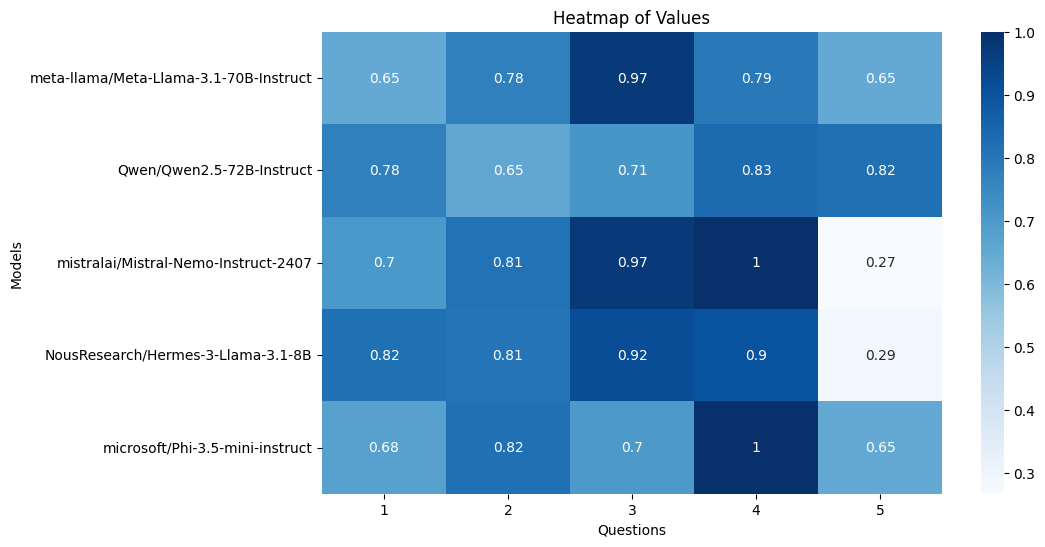

In [ ]:
values = np.array(list(sims.values()))

labels = list(sims.keys())

plt.figure(figsize=(10, 6))
sns.heatmap(values, annot=True, cmap='Blues', xticklabels=range(1, values.shape[1]+1), yticklabels=labels)
plt.title('Heatmap of Values')
plt.xlabel('Questions')
plt.ylabel('Models')
plt.show()

Let's set a similarity threshold. If a similarity between model's answer and true answer is equal or above 0.8, the answer is correct. Otherwise, I consider that the answer is wrong.

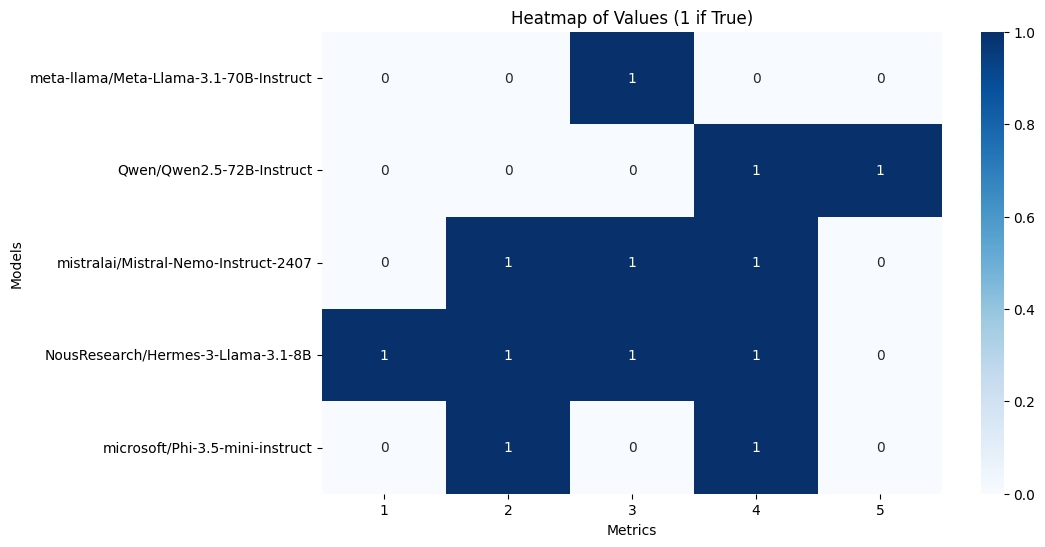

In [ ]:
binary_matrix = (values >= 0.8).astype(int)

plt.figure(figsize=(10, 6))
sns.heatmap(binary_matrix, annot=True, cmap='Blues', xticklabels=range(1, binary_matrix.shape[1]+1), yticklabels=labels)
plt.title('Heatmap of Values (1 if True)')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.show()

Now, it is easier to compare models.

The top is the following (number of right answers/number of questions):
1. NousResearch/Hermes-3-Llama-3.1-8B (4/5)
2. meta-llama/Meta-Llama-3.1-70B-Instruct (3/5)
3. Qwen/Qwen2.5-72B-Instruct; microsoft/Phi-3.5-mini-instruct (2/5)
4. meta-llama/Meta-Llama-3.1-70B-Instruct (1/5)

The forth question, concerning competetive pricing range for AI code assistant turned out to be the easiest (4/5 models answered right). At the same time, the first and the last questions turned out to be the most difficult (only the model got the correct answer). The first question was about the most paid ML positions in the USA in 2024. The last question asked which country is leading in AI.

I want to take a look at each model's answers more closely:

In [ ]:
answers['meta-llama/Meta-Llama-3.1-70B-Instruct']

['Based on national averages and online sources, here are the top 5 highest-paid ML positions in the U.S. in 2024:\n\n1. **ML Engineering Manager**: $250,000 - $350,000 per year\n2. **Research Scientist - ML**: $200,000 - $320,000 per year\n3. **Senior ML Engineer**: $180,000 - $280,000 per year\n4. **Director of ML**: $170,000 - $270,000 per year\n5. **Lead ML Engineer**: $160,000 - $260,000 per year',
 '1. TensorFlow\n2. PyTorch\n3. Scikit-learn\n4. Keras\n5. OpenCV',
 'Meta, Alibaba Cloud, DeepMind',
 '$9-$29',
 'China']

In [ ]:
answers['Qwen/Qwen2.5-72B-Instruct']

['1. Machine Learning Engineer\n2. Data Scientist\n3. AI Research Scientist\n4. Data Engineer\n5. Machine Learning Researcher',
 'TensorFlow\nPyTorch\nScikit-learn\nPandas\nNumPy',
 'Meta, Anthropic, DeepMind',
 '10-30',
 'United States']

In [ ]:
answers['mistralai/Mistral-Nemo-Instruct-2407']

['1. Machine Learning Engineer\n2. AI Architect\n3. Director of Machine Learning\n4. Data Scientist Manager\n5. Machine Learning Scientist',
 '1. Scikit-learn\n2. TensorFlow\n3. PyTorch\n4. Keras\n5. Pandas',
 'Meta, Alibaba Cloud, DeepMind',
 '10-20',
 'As of 2024, the United States is considered the leader in AI development.']

In [ ]:
answers['NousResearch/Hermes-3-Llama-3.1-8B']

['1. Machine Learning Engineer\n2. Data Scientist\n3. AI Research Scientist\n4. Natural Language Processing (NLP) Engineer\n5. Computer Vision Engineer',
 '1. TensorFlow\n2. PyTorch\n3. Scikit-learn\n4. Keras\n5. Pandas',
 '1. Meta\n2. Alibaba Cloud\n3. DeepMind',
 '$10-25',
 'As of 2023, it is difficult to determine a single country as the definitive leader in AI development for 2024, as the field of artificial intelligence is rapidly evolving and involves collaboration among multiple countries and private companies. However, some countries that are considered global leaders in AI research, development, and implementation include:\n\n1. United States\n2. China\n3. United Kingdom\n4. Canada\n5. Japan\n6. Germany\n7. France\n8. Israel\n9. South Korea\n\nThese countries have significant investments in AI research, a strong presence in the tech industry, and a track record of producing groundbreaking AI advancements. The landscape may shift in the coming years as more countries invest in 

In [ ]:
answers['microsoft/Phi-3.5-mini-instruct']

['1. Machine Learning Engineer - Lead Data Scientist\n2. Senior Machine Learning Scientist - Machine Learning Research Lead\n3. Machine Learning Architect - Chief Data Officer\n4. Director of Machine Learning Operations\n5. Principal Data Scientist - Machine Learning Product Manager',
 '1. TensorFlow\n2. PyTorch\n3. Scikit-learn\n4. Keras\n5. XGBoost',
 'Meta, DeepMind, Anthropic',
 '$9.99 - $19.99\n\nPlease note that pricing can vary based on the features offered, the level of support, and the specific platform. Always check the latest pricing from the provider for the most accurate information.',
 'China']

From what I observed, I could tell that every model has problem with prompt understanding. In each question I asked for particular output (only list of positions/libraries, only pricing range and nothing else). At the same time:

meta-llama/Meta-Llama-3.1-70B-Instruct gave more than was required in the first answer;

mistralai/Mistral-Nemo-Instruct-2407 instead of giving the right answer to the last question eloborated a bit on it (however, the country's name was right);

NousResearch/Hermes-3-Llama-3.1-8B could not answer last question at all: instead of giving a country's name, it gave a list of countries; moreover, the question was about year 2024 and the model asnwered about 2023

microsoft/Phi-3.5-mini-instruct did not gave just numbers in question 4, but also a bit of text

This points to problems with question understadning. The problem could potentially be solved by giving a system prompt to the model or reformulating the questions.

# Conclusion

+ The benchmarking results suggest that NousResearch/Hermes-3-Llama-3.1-8B is the best among the tested ones as it answered correctly 4 questions out of 5. The worst performance was demonstrated by meta-llama/Meta-Llama-3.1-70B-Instruct (only 1 right answer).

+ The results also point that questions need to be formulated more precisely and reveals the need to experiment with system prompts of models as every model at least in one question gave answer in the wrong form.

+ Moreover, the market is constantly changing and models can be trained on old information. Therefore a constantly updated RAG system is needed to use LLMs in market research.

+ Lastly, the benchmark questions were not ideal due to the nature of test task and time restrictions. Questions should be designed more precisely and based on multiple sources. For each question, the way to improve it was proposed above.

+ This work also demonstrated a fast and robust way to evaluate LLMs using a third judge model. This allows to avoid human evaluation and, thereofre, save time and resources.


# Future Research

Along with benchmarking LLMs for market questions, I believe bias research should be conducted. LLMs are designed and trained by big corporations and can be biased bacause of it (e.g., prefer creator's company or country in certain questions).

However, in the current research models did not demonstrate bias. For example, Chinese models said that USA is leading in AI; and US models said the same about China.

# References

Zheng, L., Chiang, W., Sheng, Y., Zhuang, S., Wu, Z., Zhuang, Y., Lin, Z., Li, Z., Li, D., Xing, E. P., Zhang, H., Gonzalez, J. E., & Stoica, I. (2023, June 9). Judging LLM-as-a-Judge with MT-Bench and Chatbot Arena. arXiv.org. https://arxiv.org/abs/2306.05685